In [1]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

import numpy as np
import pandas as pd

import model_predict
from sklearn.model_selection import train_test_split

In [2]:
series, scaler = model_predict.read_data_series5()

时间序列连贯


In [3]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        
        self.gru = nn.GRU(input_size, hidden_size,
                          num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: [batch, length, 3]
        x, _ = self.gru(x)
        x = self.fc(x[:, -1:, :])
        # log_var, mean = x.split(1, dim=-1)
        # x = torch.randn_like(mean) * torch.exp(log_var / 2) + mean
        return x


model_parameters = {
    "input_size": 3, "hidden_size": 12, "num_layers": 1, "output_size": 1
}

In [10]:
from importlib import reload
reload(model_predict)
model_predict.train_rnn_model(GRUModel, model_parameters, series, learn_rate=1e-3, feature_length=7,
                              continue_train=False, test_shuffle=True, epochs=1000)

训练 GRUModel 模型
结果保存到： GRUModel_best.pth
Epoch [50/1000], Learn Rate: 1.0000e-03, Training Loss: 0.4911, Validation Loss: 0.4630
Epoch [100/1000], Learn Rate: 1.0000e-03, Training Loss: 0.4625, Validation Loss: 0.4309
Epoch [150/1000], Learn Rate: 1.0000e-03, Training Loss: 0.4178, Validation Loss: 0.3969
Epoch [200/1000], Learn Rate: 1.0000e-03, Training Loss: 0.3263, Validation Loss: 0.3549
Epoch [250/1000], Learn Rate: 1.0000e-03, Training Loss: 0.2038, Validation Loss: 0.4104
Epoch [300/1000], Learn Rate: 1.0000e-03, Training Loss: 0.1407, Validation Loss: 0.5451
Epoch [350/1000], Learn Rate: 1.0000e-03, Training Loss: 0.1137, Validation Loss: 0.5987
Epoch [400/1000], Learn Rate: 1.0000e-03, Training Loss: 0.0956, Validation Loss: 0.5964
Epoch [450/1000], Learn Rate: 1.0000e-03, Training Loss: 0.0787, Validation Loss: 0.5786
Epoch [500/1000], Learn Rate: 1.0000e-03, Training Loss: 0.0588, Validation Loss: 0.5693
Epoch [550/1000], Learn Rate: 1.0000e-03, Training Loss: 0.0359, Valida

从2017年4月开始后续数据推理
MSE: 3019.77
MAE: 38.50
R^2: 0.70
MAPE: 0.22


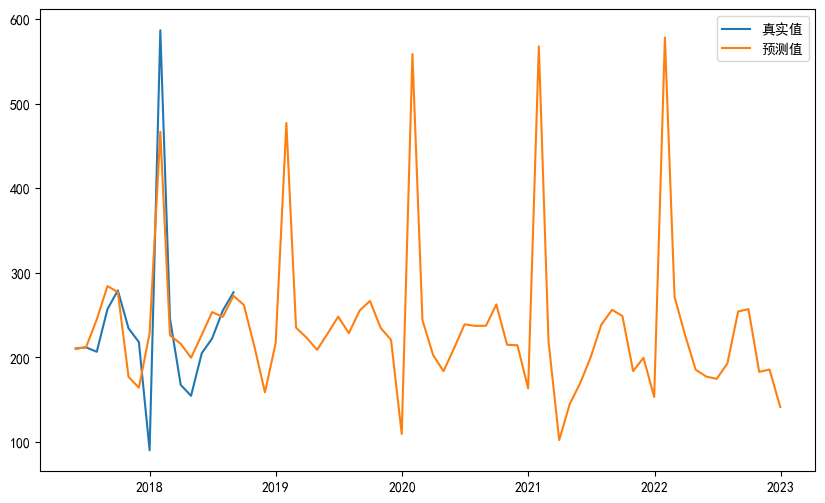

In [16]:
from importlib import reload
reload(model_predict)
model = model_predict.load_rnn_model_best(GRUModel, model_parameters)
results, _ = model_predict.predict_to_future_rnn(model, series, scaler, feature_length=7, last_months=16, months=68)

In [17]:
results

2017-05-31    209.965582
2017-06-30    211.916385
2017-07-31    244.671300
2017-08-31    284.174790
2017-09-30    277.127618
                 ...    
2022-08-31    254.100519
2022-09-30    256.920597
2022-10-31    182.703548
2022-11-30    185.482257
2022-12-31    141.167763
Freq: M, Length: 68, dtype: float64

In [5]:
results

2021-10-31    183.110554
2021-11-30    215.955359
2021-12-31    168.916917
2022-01-31    612.306441
2022-02-28    220.911915
2022-03-31    256.840244
2022-04-30    254.770799
2022-05-31    271.884159
2022-06-30    268.657171
2022-07-31    262.374375
2022-08-31    270.877391
2022-09-30    265.309642
2022-10-31    225.225640
2022-11-30    243.095469
2022-12-31    167.993352
2023-01-31    594.940247
2023-02-28    232.185092
2023-03-31    263.393617
2023-04-30    242.398118
2023-05-31    247.688378
2023-06-30    238.424475
2023-07-31    240.087714
2023-08-31    251.376853
2023-09-30    246.236524
2023-10-31    203.246148
2023-11-30    216.345985
2023-12-31    143.754866
2024-01-31    574.978431
2024-02-29    213.138589
2024-03-31    242.311484
2024-04-30    226.509563
2024-05-31    238.170143
Freq: M, dtype: float64

In [18]:
series_true = strue[strue.index.isin(spred.index)]
series_pred_cover = spred[spred.index.isin(strue.index)]

In [26]:
strue.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31'],
              dtype='datetime64[ns]', name='月份', length=199, freq=None)

In [27]:
spred.index

DatetimeIndex(['2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31'],
              dtype='datetime64[ns]', freq='M')

In [29]:
spred[spred.index.isin(strue.index)]

2021-10-31    169.502376
2021-11-30    187.189546
2021-12-31    119.975749
2022-01-31    560.018564
2022-02-28    185.184455
2022-03-31    212.035517
2022-04-30    193.105419
2022-05-31    205.199903
2022-06-30    205.680354
2022-07-31    233.267129
2022-08-31    243.932324
2022-09-30    242.194787
2022-10-31    208.759432
2022-11-30    232.620051
2022-12-31    167.370002
2023-01-31    600.390835
2023-02-28    235.610510
2023-03-31    267.696285
Freq: M, dtype: float64

In [28]:
spred.index[spred.index.isin(strue.index)]

DatetimeIndex(['2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31'],
              dtype='datetime64[ns]', freq='M')

In [23]:
series_true

月份
2021-10-31    221.704300
2021-11-30    233.154498
2021-12-31    153.797804
2022-01-31    573.775945
2022-02-28    212.002946
2022-03-31    256.382913
2022-04-30    234.820410
2022-05-31    234.958315
2022-06-30    226.220316
2022-07-31    235.017330
2022-08-31    252.665910
2022-09-30    255.014840
2022-10-31    228.974754
2022-11-30    231.061742
2022-12-31    148.104082
2021-10-31    173.409714
2021-11-30    185.662286
2021-12-31    112.094857
2022-01-31    541.610222
2022-02-28    176.069778
2022-03-31    202.259111
2022-04-30    184.891500
2022-05-31    199.798500
2022-06-30    197.730500
2022-07-31    210.214500
2022-08-31    220.829000
2022-09-30    215.141143
2022-10-31    173.409714
2022-11-30    185.662286
2022-12-31    112.094857
2023-01-31    749.004000
2023-02-28    191.048000
2023-03-31    298.564000
dtype: float64

In [22]:
strue.index.isin(spred.index)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,